# For train, validation data

In [28]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
x_train = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/x_train_220819.csv', index_col = 0)

In [30]:
y_train = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/y_train_220819.csv',index_col=0)

# For test data

In [31]:
#scale까지 완료한 test data load
test_data_scale = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/testdata_220819.csv',index_col = 0)
test_data_scale

,Volume_total,sentiment_index_total,High,Low,Vol,RSI,SMA_5,SMA_20,SMA_60,EMA,MACD,signal,Stochastic RSI_fastk,Stochastic RSI_fastd,Stochastic Oscillator Index_slowk,Stochastic Oscillator Index_slowd,Fluctuations
0,0.545000,0.195338,0.959518,0.980993,0.002937,0.597561,0.991824,1.001365,1.009106,1.007050,0.436198,0.466803,0.972114,0.989451,0.858229,0.901095,0
1,0.585140,0.239189,0.971860,0.988536,0.003102,0.604627,1.003399,0.999281,1.018160,1.013699,0.445752,0.470496,1.000000,0.989451,0.803497,0.871422,1
2,0.537338,0.261605,0.965686,0.960906,0.002922,0.527532,1.001395,0.997352,1.025831,1.012624,0.427793,0.469277,0.000000,0.657371,0.519993,0.739452,0
3,0.498165,0.284602,0.943563,0.953181,0.002353,0.562177,0.999335,0.999615,1.033139,1.015618,0.424889,0.467627,0.449382,0.483127,0.404208,0.581804,1
4,0.521225,0.240861,0.956106,0.959773,0.002201,0.585381,1.000163,1.001591,1.040965,1.020763,0.429689,0.467423,0.750362,0.399915,0.371906,0.431945,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.604923,-0.000763,0.619732,0.561479,0.008440,0.385186,0.629822,0.711181,0.809156,0.674852,0.091733,0.163752,1.000000,0.632657,0.406729,0.215167,1
325,0.362027,0.097440,0.625358,0.626757,0.003665,0.426774,0.632902,0.709112,0.805078,0.674742,0.097517,0.147132,1.000000,0.763958,0.591088,0.384335,1
326,0.327240,0.149952,0.632318,0.637323,0.001580,0.422939,0.640462,0.706033,0.802081,0.674333,0.102285,0.134943,0.961115,0.987038,0.819918,0.613067,0
327,0.375777,0.093268,0.627981,0.609392,0.002794,0.367167,0.638447,0.700260,0.798961,0.669151,0.090336,0.122416,0.395550,0.785555,0.779561,0.742524,0


In [32]:
features = test_data_scale[['Volume_total','sentiment_index_total','High','Low','Vol',
                        'RSI','SMA_5','SMA_20','SMA_60','EMA','MACD','signal','Stochastic RSI_fastk',
                        'Stochastic RSI_fastd','Stochastic Oscillator Index_slowk','Stochastic Oscillator Index_slowd',]]
label= list(test_data_scale['Fluctuations'])

In [33]:
x_test = features
y_test = np.array(label)

# LR modeling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

lr_orgin = LogisticRegression()


lr = GridSearchCV(lr_orgin, param_grid, cv=5, verbose=3).fit(x_train, y_train)     

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.534 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.532 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.532 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.532 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.532 total time=   0.0s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l

C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/5] END ..................C=10, penalty=l2;, score=0.817 total time=   0.0s
[CV 3/5] END ..................C=10, penalty=l2;, score=0.817 total time=   0.0s
[CV 4/5] END ..................C=10, penalty=l2;, score=0.825 total time=   0.0s
[CV 5/5] END ..................C=10, penalty=l2;, score=0.840 total time=   0.0s
[CV 1/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=100, penalty=l2;, score=0.811 total time=   0.0s
[CV 2/5] END .................C=100, penalty=l2;, score=0.817 total time=   0.0s
[CV 3/5] END .................C=100, penalty=l2;, score=0.806 total time=   0.0s
[CV 4/5] END ...............

C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [35]:
lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [36]:
lr_pred = lr.predict(x_test)

In [37]:
print("Test Accuracy: %f" % accuracy_score(y_test, lr_pred))

Test Accuracy: 0.808511


# Results Summary

Text(0.5, 257.44, 'Predicted label')

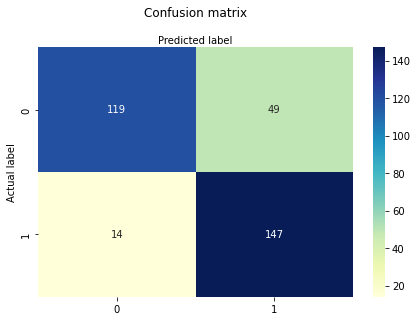

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, lr_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))
print("Precision:",metrics.precision_score(y_test, lr_pred))
print("Recall:",metrics.recall_score(y_test, lr_pred))
print("F1score:",metrics.f1_score(y_test, lr_pred))

Accuracy: 0.8085106382978723
Precision: 0.75
Recall: 0.9130434782608695
F1score: 0.8235294117647057


In [45]:
import joblib #수정해야함

# 모델 저장
joblib.dump(lr, 'C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/Bitcoin_result_revision/lr_bitcoin_sent.pkl')

# 모델 불러오기
lr_model = joblib.load('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/Bitcoin_result_revision/lr_bitcoin_sent.pkl')

In [46]:
lr_model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lr_model.predict(x_test)
predictions = [value for value in y_pred]

accuracy_score(y_test, predictions)

0.8085106382978723

In [48]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['class(0)', 'class(1)'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class(0),0.894737,0.708333,0.790698,168.000000
class(1),0.750000,0.913043,0.823529,161.000000
accuracy,0.808511,0.808511,0.808511,0.808511
macro avg,0.822368,0.810688,0.807114,329.000000
weighted avg,0.823908,0.808511,0.806764,329.000000


In [49]:
lr_model.best_estimator_

LogisticRegression(C=10)

In [50]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률 추출
lr_pred_proba_class_1 = lr_model.predict_proba(x_test)[:,1]
lr_pred_proba_class_1

array([0.80062191, 0.84646193, 0.00580393, 0.62808158, 0.97826386,
       0.08199147, 0.04165815, 0.95938698, 0.86868668, 0.50488513,
       0.73436075, 0.02220899, 0.12709875, 0.45871985, 0.36301939,
       0.57691568, 0.24332518, 0.28553933, 0.38250988, 0.30927599,
       0.32332431, 0.99869298, 0.97805434, 0.72410328, 0.59362376,
       0.93753468, 0.92343946, 0.430981  , 0.84953579, 0.02979383,
       0.98330663, 0.94597122, 0.89366035, 0.89933056, 0.35786115,
       0.01057427, 0.56806863, 0.34272074, 0.40063993, 0.53670027,
       0.28724587, 0.35021295, 0.41847369, 0.39081758, 0.47500358,
       0.99840755, 0.86867999, 0.63601071, 0.47762376, 0.99052012,
       0.96302219, 0.8866958 , 0.81161422, 0.01497899, 0.21610937,
       0.98488598, 0.99774188, 0.87758855, 0.8637465 , 0.88815108,
       0.06974304, 0.05793869, 0.6990209 , 0.54072292, 0.41923432,
       0.99874852, 0.94453613, 0.81725476, 0.42005698, 0.94535692,
       0.94168638, 0.75707721, 0.27220079, 0.02807036, 0.24025

In [51]:
fprs, tprs, thresholds = roc_curve(y_test, lr_pred_proba_class_1)

# 반환된 임곗값 배열에서 샘플로 데이터 추출
# thresholds[0]은 max(예측확률)+1 값이 임의로 지정됨.

thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index':thr_index,
             'FPR':fprs[thr_index],
             'TPR':tprs[thr_index]})

,index,FPR,TPR
0,1,0.000000,0.006211
1,2,0.000000,0.242236
2,3,0.005952,0.242236
3,4,0.005952,0.285714
4,5,0.011905,0.285714
...,...,...,...
80,81,0.565476,0.981366
81,82,0.565476,0.987578
82,83,0.619048,0.987578
83,84,0.619048,1.000000


In [52]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()

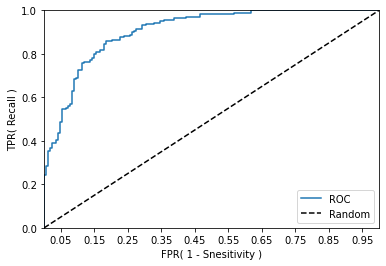

In [53]:
from sklearn.metrics import roc_curve

roc_curve_plot(y_test, lr_pred_proba_class_1)

In [54]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_model.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score: ', roc_score)

ROC AUC Score:  0.9059819580005916
